In [8]:
import numpy as np
import numpy.linalg as la
import numpy.random as rn
import matplotlib.pyplot as plt

## FISTA Method 

In [9]:
def prox(x, eta, lam):
    u = np.zeros(x.shape[0])
    
    for i in range(x.shape[0]):
        u[i] = np.sign(x[i])*np.max(np.abs(x[i]) - eta*lam)
    
    return u

def fista(x, v, theta, A, b, t, lam):
    eta = 1e-8
    #alfa = 4
    
    grad = np.dot(np.transpose(A), np.matmul(A, v) - b)
    v = v - eta*grad
    
    # find theta
    theta_old = theta
    theta = (1 + np.sqrt(1 + 4*theta**2))/2
    
    # update
    #y = x + (theta*gam)/(gam + alfa*theta)*(v - x)
    
    xprev = x
    x = prox(v, eta, lam)
    v = x + (theta_old - 1)/(theta)*(x - xprev)
    
    return x, v, theta

In [18]:
def fista2(x, v, theta, A, b, t, lam):
    eta = 1e-8
    #alfa = 4
    
    grad = np.dot(np.transpose(A), np.matmul(A, v) - b)
    v = v - eta*grad
    
    # find theta
    theta_old = theta
    theta = (1 + np.sqrt(1 + 4*theta**2))/2
    
    # update
    #y = x + (theta*gam)/(gam + alfa*theta)*(v - x)
    
    xprev = x
    xtest = prox(v, eta, lam)
    
    if obj(A, xprev, b) >= obj(A, xtest, b):
        x = xtest
    else:
        x = xprev
    
    v = x + (theta_old - 1)/(theta)*(x - xprev)
    
    return x, v, theta

In [16]:
def obj(A, x, b):
    f = 0.5*la.norm(np.matmul(A,x) - b)**2 + la.norm(x, 1)
    
    return f

##  Set up

In [12]:
def descent2(update, A, b, reg, theta, T=int(1e4)):
    x = np.zeros(A.shape[1])
    v = x
    error = []
    
    for t in range(T):
        x, v, theta = update(x, v, theta, A, b, t, reg)
        
        # record error
        if(t % 1 == 0) or (t == T - 1):
            error.append(la.norm(np.dot(A, x) - b))
            
            assert not np.isnan(error[-1])
    
    return x, error

## Run Cases

In [13]:
rn.seed([42])
T = int(1e3)
rows = 3000
cols = 1500

A = rn.rand(rows, cols)

x_true = rn.rand(cols)

b = np.matmul(A,x_true)

In [14]:
x_fs, error_fs = descent2(fista, A, b, reg=1., theta=1., T=T)

In [19]:
x_ng, error_ng = descent2(fista2, A, b, reg=1., theta=1., T=T)

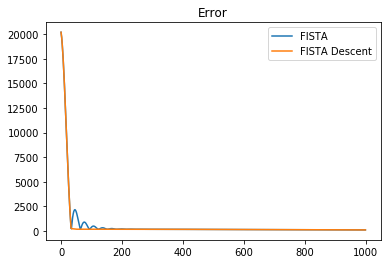

In [20]:
%matplotlib inline
plt.plot(error_fs, label="FISTA")
plt.plot(error_ng, label="FISTA Descent")
plt.title('Error')
plt.legend()